In [53]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [36]:
# Load the data
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [37]:
new_df = df.drop(["MYOPIC"], axis=1)
new_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [38]:
# Find null values
for column in new_df.columns:
    print(f"Column {column} has {new_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [39]:
scaler = StandardScaler()

# Train the scaler with the data.
X_scaled = scaler.fit_transform(df)

In [40]:
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9289880687733467

In [41]:
# Get the shape of features after reduction
myopia_pca.shape

(618, 11)

In [42]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
tsne_features = tsne.fit_transform(myopia_pca)

/Users/xilo/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.002s...
[t-SNE] Computed neighbors for 618 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.507443
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.252731
[t-SNE] KL divergence after 2500 iterations: 1.941301


In [43]:
tsne_features.shape

(618, 3)

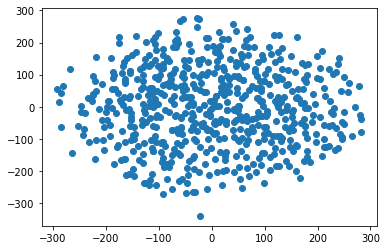

In [44]:
plt.scatter(tsne_features[:,0],tsne_features[:,1])

In [45]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8611.719398
1,2,7453.292155
2,3,6686.361671
3,4,6206.151491
4,5,5888.248458


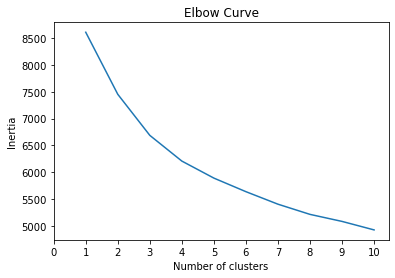

In [46]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
# Create a DataFrame from the PCA transformed data for K-Means modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
df_pca = pd.DataFrame(myopia_pca, columns=columns)
df_pca['class']= km.labels_
df_pca.head()


,1,2,3,4,5,6,7,8,9,10,11,class
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348,0
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646,4
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604,8
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667,0
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567,7


/Users/xilo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/xilo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


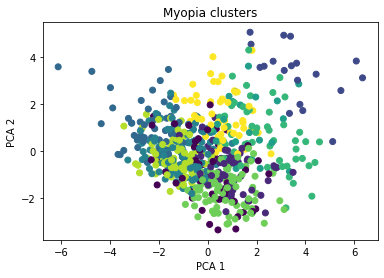

In [52]:
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)
# Plot the Clusters

plt.scatter(x=df_pca[1], y=df_pca[2], c=df_pca['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

## Analysis

I prepared the data and used three different algorithms; PCA, t-SNE, and K-Means. I applied dimensionality reduction using PCA, used t-SNE, and performed a cluster Analysis with K-Means. What I found is that the optimal number of clusters is 3. Additionally, the t-SNE model did not help find clusters. However, it is essential to note that the dataset is small to make an accurate prediction. Therefore, I recommend getting a more extensive dataset and splitting the data into Test and Training to test the above models and others to make more accurate predictions and clustering.
